In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import Ridge

In [70]:
df = pd.read_csv("processed_data.csv")
df = df.dropna(axis=0)
# y = df[["cohesion", "syntax", "vocabulary", "phraseology", "grammar", "conventions"]]
y = df["vocabulary"]
X = df.iloc[:, 7:]
X = X.drop("corrected_text", axis=1)
X["text_standard"].mask(df["text_standard"] == "-", 0, inplace=True)
X["verb_to_adv"].mask(np.isinf(df["verb_to_adv"]), 0, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4)

In [71]:
pd.set_option("display.max_columns", None)
X_train.describe()
# X_train.columns.values

,number_of_words,stopwords_frequency,av_word_per_sen,punctuations,ARI,freq_of_verb,freq_of_adj,freq_of_adv,freq_of_distinct_adj,freq_of_distinct_adv,sentence_complexity,freq_of_wrong_words,sentiment_compound,sentiment_positive,sentiment_negative,num_of_grammar_errors,num_of_short_forms,Incorrect_form_ratio,flesch_reading_ease,flesch_kincaid_grade,dale_chall_readability_score,text_standard,mcalpine_eflaw,number_of_diff_words,freq_diff_words,ttr,coherence_score,lexrank_avg_min_diff,lexrank_interquartile,freq_of_noun,freq_of_transition,freq_of_pronoun,noun_to_adj,verb_to_adv,phrase_diversity
count,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000,2933.000000
mean,430.586430,0.502804,30.164694,0.070698,13.608592,0.105856,0.091039,0.041172,0.058835,0.021479,1.532121,0.016973,0.725057,0.155494,0.058511,25.704739,0.039550,0.062948,65.064732,11.555336,6.605926,10.500852,-17.377395,43.444255,0.104217,0.073138,0.437127,0.470026,0.446724,0.250460,0.043399,0.091881,0.374884,0.411452,0.155498
std,191.803686,0.050591,28.436080,0.024859,13.992844,0.025812,0.022958,0.016425,0.016055,0.009023,0.070260,0.015950,0.599662,0.068989,0.044383,17.638521,0.313091,0.036544,27.585674,10.507197,1.617129,7.059706,39.676275,21.177546,0.033293,0.015691,0.097165,0.191148,0.248717,0.045041,0.014865,0.032754,0.116151,0.208396,0.091828
min,14.000000,0.218543,6.344828,0.000000,1.000000,0.004706,0.010471,0.003922,0.000000,0.000000,1.170836,0.000000,-0.997900,0.000000,0.000000,0.000000,0.000000,0.000000,-489.820000,1.600000,1.150000,0.000000,-832.000000,3.000000,0.028078,0.029574,0.176278,0.000000,0.000000,0.112994,0.002488,0.004963,0.031250,0.029412,0.002232
25%,294.000000,0.470149,18.176471,0.053763,8.000000,0.088561,0.076119,0.029598,0.047745,0.015385,1.487932,0.006452,0.920100,0.106000,0.025000,14.000000,0.000000,0.037225,59.840000,7.100000,6.020000,7.000000,-21.700000,28.000000,0.080097,0.062675,0.375084,0.343050,0.269053,0.219316,0.033133,0.069149,0.296610,0.277778,0.091096
50%,404.000000,0.502976,23.033333,0.070261,10.000000,0.105105,0.089416,0.039702,0.057407,0.020468,1.531974,0.011933,0.989000,0.147000,0.048000,21.000000,0.000000,0.054131,70.130000,9.100000,6.470000,9.000000,-7.300000,40.000000,0.100709,0.072144,0.421990,0.491640,0.422366,0.250230,0.042553,0.090062,0.361111,0.384615,0.137513
75%,526.000000,0.536145,33.500000,0.086957,15.000000,0.121951,0.104553,0.051546,0.068410,0.026455,1.579532,0.022796,0.996600,0.196000,0.082000,32.000000,0.000000,0.079710,77.570000,12.800000,7.050000,11.000000,-0.300000,55.000000,0.123596,0.082840,0.477192,0.612453,0.599365,0.278947,0.052632,0.112840,0.435028,0.506329,0.198413
max,1260.000000,0.682353,578.000000,0.164835,287.000000,0.232877,0.203233,0.142857,0.130137,0.072816,1.797377,0.207207,0.999900,0.473000,0.287000,216.000000,7.000000,0.508235,99.870000,225.200000,33.320000,120.000000,15.200000,203.000000,0.271754,0.168831,1.000000,0.904342,1.431621,0.538824,0.148718,0.242424,1.086420,5.000000,0.851528


In [99]:
def result(predictions):
    predictions = predictions.tolist()
    result_list=[]
    for pred in predictions:
        result = pred // 0.5 * 0.5
        if (pred - result) > 0.25:
            result += 0.5
        if result < 1.0:
            result = 1.0
        if result > 5.0:
            result = 5.0
        result_list.append(result)
    return result_list

# Accuracy score
def accuracy(Ypred, Ytrue):
    Ytrue = Ytrue.tolist()
    accurate = 0
    for i in range(len(Ytrue)):
        if Ytrue[i] == Ypred[i]:
            accurate += 1
    return accurate / len(Ytrue)

# approximate accurancy rate
def score(pred, test):
    test = test.tolist()
    correct = 0
    for i in range(len(test)):
        p = pred[i]
        t = test[i]
        if p < t+0.5 and p > t-0.5:
            correct += 1
    return correct / len(test)

def accuracy_range(Ytrue, Ypred):
    Ytrue=Ytrue.tolist()
    accurate_range=0
    for i in range(len(Ytrue)):
        if abs(Ytrue[i] - Ypred[i])<=0.5:
            accurate_range+=1
    return accurate_range/len(Ytrue)

# Total error / total number of points => by average what's the error for each point
def error_rate(Ytrue, Ypred):
    Ytrue=Ytrue.tolist()
    error=0
    for i in range(len(Ytrue)):
        error += abs(Ytrue[i] - Ypred[i])
    return error/len(Ytrue)


In [109]:
lr = LinearRegression()
lr.fit(X_train, y_train)
# print(lr.score(X_test, y_test))
prediction = lr.predict(X_test)
# make prediction to the nearest 0.5 level
adj_prediction = result(prediction)
accuracy_range(y_test, prediction)
accuracy(adj_prediction, y_test)
# lr.score(X_test, y_test)
error_rate(y_test, adj_prediction)

0.3440695296523517

In [74]:
import pickle
pickle.dump(lr, open('lr_vocab.sav', 'wb'))

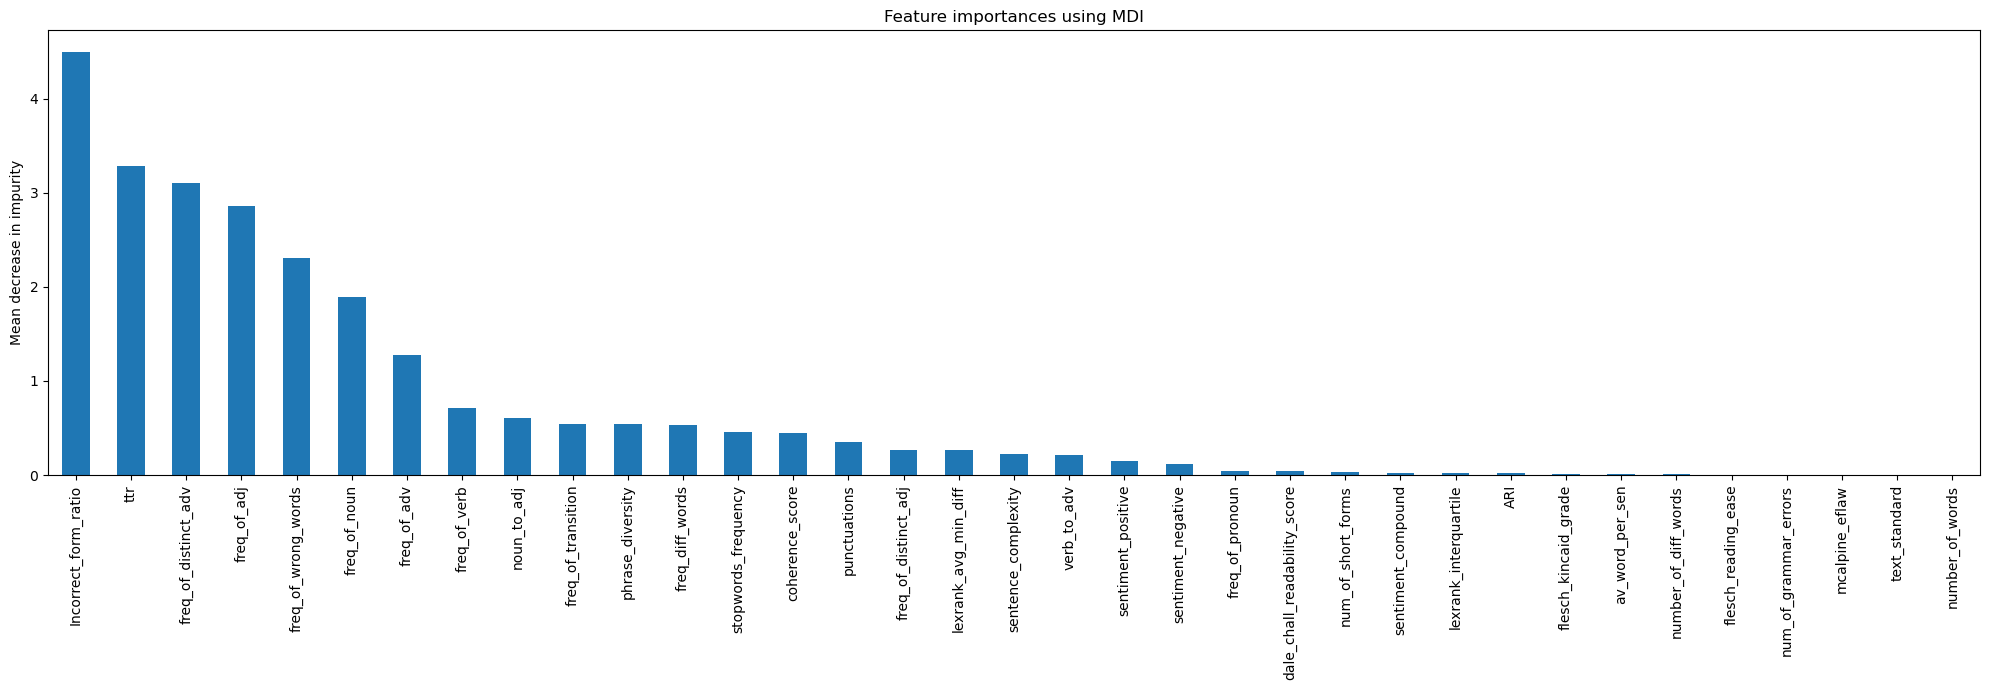

In [75]:
# Feature Importance using MDI
import matplotlib.pyplot as plt
importances = abs(lr.coef_)

forest_importances = pd.Series(importances, index=X_test.columns.values.tolist()).sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(20,7))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### Using the prediction of vocab to train the model for cohesion

In [135]:
new_feature = result(lr.predict(X))
vocab = pd.Series(new_feature)
features = X.loc[:]
features["vocab"] = vocab

array([2.81555508, 2.68372646, 3.21140669, ..., 3.11819228, 3.53517109,
       3.46363437])

In [136]:
target = y = df["cohesion"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(features, target, test_size=1/4)

In [137]:
features.describe()

,number_of_words,stopwords_frequency,av_word_per_sen,punctuations,ARI,freq_of_verb,freq_of_adj,freq_of_adv,freq_of_distinct_adj,freq_of_distinct_adv,sentence_complexity,freq_of_wrong_words,sentiment_compound,sentiment_positive,sentiment_negative,num_of_grammar_errors,num_of_short_forms,Incorrect_form_ratio,flesch_reading_ease,flesch_kincaid_grade,dale_chall_readability_score,text_standard,mcalpine_eflaw,number_of_diff_words,freq_diff_words,ttr,coherence_score,lexrank_avg_min_diff,lexrank_interquartile,freq_of_noun,freq_of_transition,freq_of_pronoun,noun_to_adj,verb_to_adv,phrase_diversity,vocab
count,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000,3911.000000
mean,430.492969,0.502922,29.996384,0.070477,13.513168,0.105560,0.091153,0.041060,0.058873,0.021534,1.532013,0.017079,0.719335,0.154521,0.058639,25.927896,0.043979,0.063469,65.340386,11.468704,6.609496,10.535669,-17.089159,43.391204,0.104086,0.073260,0.437410,0.470355,0.445883,0.250501,0.043341,0.091874,0.375289,0.413016,0.156217,3.237279
std,191.868449,0.050646,26.954764,0.024744,13.254397,0.025723,0.022677,0.016349,0.015895,0.009050,0.069873,0.015990,0.606371,0.068451,0.044511,18.338363,0.343904,0.037143,26.216732,9.953318,1.543899,7.112519,37.589597,21.062527,0.032972,0.015553,0.097053,0.190822,0.248943,0.045171,0.014914,0.032693,0.114755,0.211292,0.092775,0.386903
min,14.000000,0.000000,6.344828,0.000000,1.000000,0.004706,0.010471,0.003731,0.000000,0.000000,1.163762,0.000000,-0.998700,0.000000,0.000000,0.000000,0.000000,0.000000,-489.820000,1.600000,1.090000,0.000000,-832.000000,3.000000,0.028078,0.029574,0.176278,0.000000,0.000000,0.112994,0.002488,0.004854,0.031250,0.029412,0.002232,1.000000
25%,294.000000,0.470372,18.274295,0.053666,8.000000,0.088351,0.076412,0.029544,0.047872,0.015423,1.487621,0.006551,0.919100,0.107000,0.025000,14.000000,0.000000,0.037594,59.925000,7.100000,6.025000,7.000000,-21.200000,28.000000,0.080271,0.062699,0.375034,0.343726,0.266783,0.219086,0.033058,0.069115,0.296296,0.276456,0.090909,3.000000
50%,402.000000,0.503759,23.187500,0.069820,10.000000,0.104701,0.089820,0.039604,0.057534,0.020534,1.532722,0.012146,0.988900,0.147000,0.049000,21.000000,0.000000,0.054893,70.160000,9.100000,6.470000,9.000000,-7.500000,40.000000,0.100559,0.072269,0.421707,0.490442,0.423006,0.250000,0.042553,0.090278,0.362319,0.385714,0.138614,3.500000
75%,526.500000,0.536493,33.000000,0.086480,15.000000,0.121673,0.104712,0.051282,0.068314,0.026549,1.578677,0.022799,0.996500,0.194000,0.081000,32.000000,0.000000,0.080627,77.670000,12.600000,7.040000,11.000000,-0.500000,54.000000,0.123306,0.082816,0.476911,0.613037,0.595955,0.279304,0.052495,0.113347,0.437237,0.509619,0.200190,3.500000
max,1260.000000,0.682353,578.000000,0.164835,287.000000,0.232877,0.203233,0.142857,0.130137,0.072816,1.804454,0.207207,0.999900,0.473000,0.312000,294.000000,7.000000,0.515789,102.000000,225.200000,33.320000,120.000000,15.200000,203.000000,0.272189,0.168831,1.000000,0.904342,1.613200,0.538824,0.148718,0.242424,1.086420,5.000000,0.861702,5.000000


In [138]:
new_lr = LinearRegression()
new_lr.fit(X_train2, y_train2)
prediction2 = new_lr.predict(X_train2)
# make prediction to the nearest 0.5 level
adj_prediction2 = result(prediction2)
# accuracy_range(y_test2, prediction2)
accuracy(adj_prediction2, y_test2)
# # lr.score(X_test, y_test)
# error_rate(y_test2, adj_prediction2)


0.2689161554192229

In [139]:
pickle.dump(new_lr, open('lr_cohesion.sav', 'wb'))

In [140]:
prediction2

array([3.6976841 , 3.04165615, 3.48579572, ..., 2.62313453, 3.08160722,
       2.9498104 ])